# **Races feature engineering**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pprint import pprint

os.chdir(os.path.dirname(os.getcwd()))      # Move to parent directory


In [3]:
print(os.getcwd())

cyclists_df = pd.read_csv('dataset/cleaned_cyclists.csv')
races_df = pd.read_csv('dataset/cleaned_races.csv')

d:\Magistrale\DM\Project\dm-2425


Given that we leave pending the drop of stages with climb total or profile null, we firstly perform that 

In [4]:
initial_rows = len(races_df)
races_df.dropna(subset=['climb_total', 'profile'], inplace=True)
rows_dropped = initial_rows - len(races_df)
print(f"Number of rows dropped: {rows_dropped}")


Number of rows dropped: 180556


### ```cyclists_number``` column 

In [5]:
# Count the number of occurrences of each _url
url_counts = races_df['_url'].value_counts().reset_index()
url_counts.columns = ['_url', 'cyclist_number']

# Merge the counts back to the original dataframe
races_df = races_df.merge(url_counts, on='_url', how='left')

# Display the first few rows to verify
races_df

,_url,name,points,length,climb_total,profile,startlist_quality,position,cyclist,cyclist_age,is_tarmac,cyclist_team,start_date,duration,cyclist_number
0,tour-de-france/1978/stage-6,Tour de France,100.0,162000.0,1101.0,1.0,1241,0,sean-kelly,22.0,True,vini-ricordi-pinarello-sidermec-1986,1978-07-05,04:02:24,106
1,tour-de-france/1978/stage-6,Tour de France,100.0,162000.0,1101.0,1.0,1241,1,gerrie-knetemann,27.0,True,norway-1987,1978-07-05,04:02:24,106
2,tour-de-france/1978/stage-6,Tour de France,100.0,162000.0,1101.0,1.0,1241,2,rene-bittinger,24.0,True,NaN,1978-07-05,04:02:24,106
3,tour-de-france/1978/stage-6,Tour de France,100.0,162000.0,1101.0,1.0,1241,3,joseph-bruyere,30.0,True,navigare-blue-storm-1993,1978-07-05,04:02:24,106
4,tour-de-france/1978/stage-6,Tour de France,100.0,162000.0,1101.0,1.0,1241,4,sven-ake-nilsson,27.0,True,spain-1991,1978-07-05,04:02:24,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409055,giro-d-italia/2010/stage-1,Giro d'Italia,80.0,8400.0,60.0,1.0,878,192,anders-lund-1,25.0,True,watney-avia-1972,2010-05-08,00:11:38,197
409056,giro-d-italia/2010/stage-1,Giro d'Italia,80.0,8400.0,60.0,1.0,878,193,andrea-masciarelli,28.0,True,NaN,2010-05-08,00:11:40,197
409057,giro-d-italia/2010/stage-1,Giro d'Italia,80.0,8400.0,60.0,1.0,878,194,marco-corti,24.0,True,kazakhstan-2001,2010-05-08,00:11:41,197
409058,giro-d-italia/2010/stage-1,Giro d'Italia,80.0,8400.0,60.0,1.0,878,195,robbie-mcewen,38.0,True,radio-popular-paredes-boavista-2023,2010-05-08,00:11:48,197


In [6]:
# Print the highest value of cyclist_number in the dataframe
max_cyclist_number = races_df['cyclist_number'].min()
print(f"The highest value of cyclist_number in the database is: {max_cyclist_number}")

The highest value of cyclist_number in the database is: 1


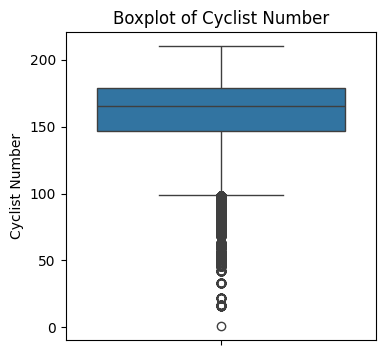

In [7]:
plt.figure(figsize=(4, 4))
sns.boxplot(y='cyclist_number', data=races_df)
plt.title('Boxplot of Cyclist Number')
plt.ylabel('Cyclist Number')
plt.show()

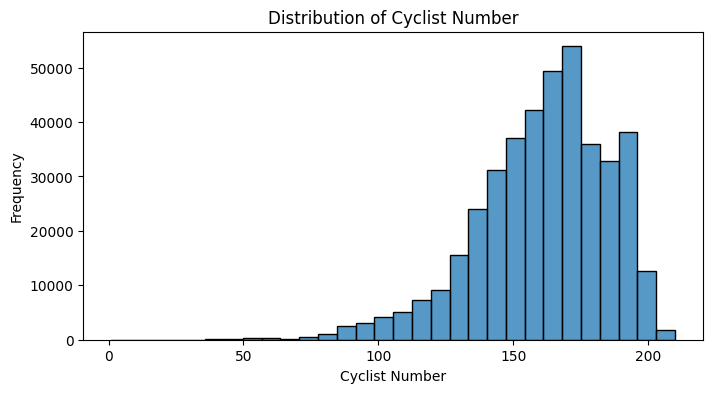

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(races_df['cyclist_number'], bins=30)
plt.title('Distribution of Cyclist Number')
plt.xlabel('Cyclist Number')
plt.ylabel('Frequency')
plt.show()

### ```career_level```  column

This feature inserts at each races row the level of the relevant rider up to and including that day. The level is calculated in the following way

In [9]:
from utils import compute_cyclist_cumulative_performance

In [10]:
import math

WEIGHTS = {f'{i}_points': math.floor((1 - (i - 1) * 0.02) * 100) / 100 for i in range(1, 51)}
print(WEIGHTS)

compute_cyclist_cumulative_performance(races_df, WEIGHTS)

{'1_points': 1.0, '2_points': 0.98, '3_points': 0.96, '4_points': 0.94, '5_points': 0.92, '6_points': 0.9, '7_points': 0.88, '8_points': 0.86, '9_points': 0.84, '10_points': 0.82, '11_points': 0.8, '12_points': 0.78, '13_points': 0.76, '14_points': 0.74, '15_points': 0.72, '16_points': 0.7, '17_points': 0.68, '18_points': 0.65, '19_points': 0.64, '20_points': 0.62, '21_points': 0.6, '22_points': 0.58, '23_points': 0.56, '24_points': 0.54, '25_points': 0.52, '26_points': 0.5, '27_points': 0.48, '28_points': 0.46, '29_points': 0.43, '30_points': 0.42, '31_points': 0.4, '32_points': 0.38, '33_points': 0.36, '34_points': 0.34, '35_points': 0.31, '36_points': 0.29, '37_points': 0.28, '38_points': 0.26, '39_points': 0.24, '40_points': 0.21, '41_points': 0.19, '42_points': 0.17, '43_points': 0.16, '44_points': 0.14, '45_points': 0.12, '46_points': 0.09, '47_points': 0.07, '48_points': 0.05, '49_points': 0.04, '50_points': 0.02}


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Reshape and transform the column
races_df['cyclist_level'] = scaler.fit_transform(races_df[['cyclist_level']])

# Check the normalized values
races_df['cyclist_level'].describe()

count    4.090600e+05
mean    -3.196105e-17
std      1.000001e+00
min     -1.213853e+00
25%     -7.398652e-01
50%     -2.492832e-01
75%      5.314861e-01
max      2.003403e+01
Name: cyclist_level, dtype: float64

Now an average of the cyclists levels for each stage is averaged before performing the reduction of the dataset by stage

In [12]:
# Calcola il livello medio per ciascun gruppo '_url'
average_level = races_df.groupby('_url')['cyclist_level'].mean().reset_index()

# Rinomina la colonna a 'avg_cyclists_level'
average_level.rename(columns={'cyclist_level': 'avg_cyclists_level'}, inplace=True)

# Unisce la media al dataframe principale
races_df = races_df.merge(average_level, on='_url', how='left')

# Rimuove la colonna 'cyclist_level' poiché non è più necessaria
races_df.drop(columns=['cyclist_level'], inplace=True)

# Verifica il risultato
print(races_df.head(10))


                          _url            name  points    length  climb_total  \
0  tour-de-france/1978/stage-6  Tour de France   100.0  162000.0       1101.0   
1  tour-de-france/1978/stage-6  Tour de France   100.0  162000.0       1101.0   
2  tour-de-france/1978/stage-6  Tour de France   100.0  162000.0       1101.0   
3  tour-de-france/1978/stage-6  Tour de France   100.0  162000.0       1101.0   
4  tour-de-france/1978/stage-6  Tour de France   100.0  162000.0       1101.0   
5  tour-de-france/1978/stage-6  Tour de France   100.0  162000.0       1101.0   
6  tour-de-france/1978/stage-6  Tour de France   100.0  162000.0       1101.0   
7  tour-de-france/1978/stage-6  Tour de France   100.0  162000.0       1101.0   
8  tour-de-france/1978/stage-6  Tour de France   100.0  162000.0       1101.0   
9  tour-de-france/1978/stage-6  Tour de France   100.0  162000.0       1101.0   

   profile  startlist_quality  position            cyclist  cyclist_age  \
0      1.0               1241    

### **Dataset reduction** 

Because we decided to perform clustering analysis over single stages, we group by the dataframe by ```_url``` and we take only one row for each stage, with only those values useful for analyze the stages. Before that we compute average age at the startlist to keep also that feature

In [13]:
# Compute the average age for each _url group
average_age = races_df.groupby('_url')['cyclist_age'].mean().reset_index()

# Rename the column to 'average_age'
average_age.rename(columns={'cyclist_age': 'average_age'}, inplace=True)

# Merge the average_age back to the races_df
races_df = races_df.merge(average_age, on='_url', how='left')

# Display the updated dataframe
races_df.drop(columns=['cyclist_age', 'cyclist_team', 'position', 'cyclist'], inplace=True)

In [14]:
races_df = races_df.groupby('_url').first().reset_index()

# Print the remaining columns in the races_df dataframe
print("Remaining columns in the races_df dataframe:")
pprint(races_df.columns.to_list())

Remaining columns in the races_df dataframe:
['_url',
 'name',
 'points',
 'length',
 'climb_total',
 'profile',
 'startlist_quality',
 'is_tarmac',
 'start_date',
 'duration',
 'cyclist_number',
 'avg_cyclists_level',
 'average_age']


Count how many rows remaining

In [15]:
remaining_rows = len(races_df)
print(f"Number of remaining rows: {remaining_rows}")

Number of remaining rows: 2614


In [16]:
races_df.describe()

,points,length,climb_total,profile,startlist_quality,cyclist_number,avg_cyclists_level,average_age
count,2614.000000,2614.000000,2614.000000,2614.000000,2614.000000,2614.000000,2614.000000,2614.000000
mean,89.850803,166532.999235,2388.298011,2.664116,1175.598699,156.488141,0.016280,28.657916
std,46.032991,61207.946373,1395.058276,1.509391,389.668771,27.848471,0.233683,0.742413
min,20.000000,1000.000000,2.000000,1.000000,156.000000,1.000000,-0.800729,26.460870
25%,80.000000,152225.000000,1353.250000,1.000000,885.000000,142.000000,-0.156477,28.321233
50%,80.000000,178000.000000,2308.000000,2.000000,1044.500000,160.000000,-0.017578,28.736098
75%,100.000000,202000.000000,3363.000000,4.000000,1520.000000,175.000000,0.121325,29.133203
max,350.000000,338000.000000,6974.000000,5.000000,2047.000000,210.000000,1.228167,30.204678


### ```race_importance``` column 

In [17]:
# Create the new feature 'race_importance'
races_df['race_importance'] = (races_df['startlist_quality'] * races_df['cyclist_number'] * races_df['points'])

# Calculate the minimum and maximum of 'race_importance'
min_val = races_df['race_importance'].min()
max_val = races_df['race_importance'].max()

# Normalize 'race_importance' between 0 and 1, overwriting the existing column
races_df['race_importance'] = (races_df['race_importance'] - min_val) / (max_val - min_val)

# Display the first few rows to verify
print(races_df[['startlist_quality', 'cyclist_number', 'race_importance']].head(10))



   startlist_quality  cyclist_number  race_importance
0               1251             144         0.498403
1               1149              98         0.311195
2               1140             123         0.387745
3               1175             129         0.419218
4               1120             120         0.371614
5                949             127         0.333150
6               1139              97         0.305322
7               1020             112         0.315736
8               1089             125         0.376395
9                705             126         0.245306


In [18]:
min_race_importance = races_df['race_importance'].min()
print(f"The lowest value of race_importance in the dataframe is: {min_race_importance}")

The lowest value of race_importance in the dataframe is: 0.0


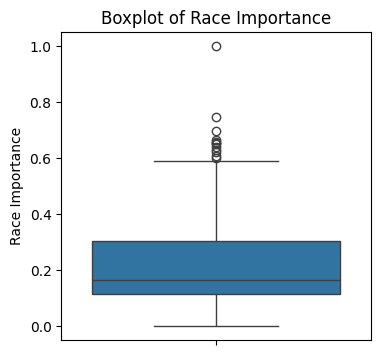

In [19]:
plt.figure(figsize=(4, 4))
sns.boxplot(y='race_importance', data=races_df)
plt.title('Boxplot of Race Importance')
plt.ylabel('Race Importance')
plt.show()

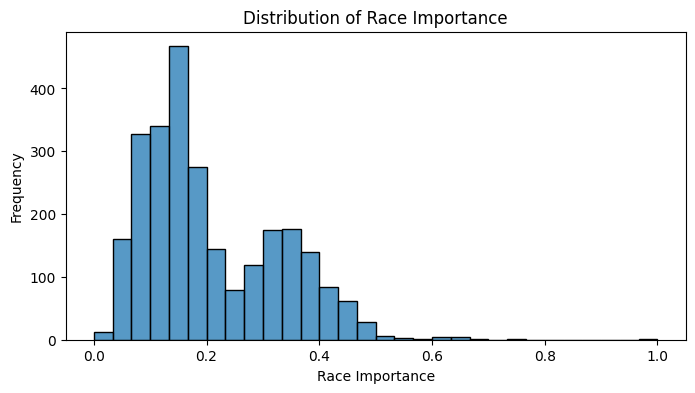

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(races_df['race_importance'], bins=30)
plt.title('Distribution of Race Importance')
plt.xlabel('Race Importance')
plt.ylabel('Frequency')
plt.show()

### ```top_races``` column


In [21]:
# Sort the races DataFrame by the 'race_importance' column in descending order
sorted_races_df = races_df.sort_values(by='race_importance', ascending=False)

# Define the bins and labels
bins = [0, 21, 51, 151, 501, 751, 1001, 1301, 1701, 2001, 2401, len(sorted_races_df) + 1]
labels = ['Top 20', 'Top 50', 'Top 150', 'Top 500', 'Top 750', 'Top 1000', 'Top 1300', 'Top 1700', 'Top 2000', 'Top 2400', 'Rest']

# Create a new column 'top_races' based on the bins
sorted_races_df['top_races'] = pd.cut(range(1, len(sorted_races_df) + 1), bins=bins, labels=labels, right=False)

# Add the 'top_races' column to the original races_df
races_df = races_df.merge(sorted_races_df[['_url', 'top_races']], on='_url', how='left')

In [22]:
races_df.value_counts("top_races")

top_races
Top 1700    400
Top 2400    400
Top 500     350
Top 1300    300
Top 2000    300
Top 750     250
Top 1000    250
Rest        214
Top 150     100
Top 50       30
Top 20       20
Name: count, dtype: int64

### ```difficulty_idx``` column


In [23]:
from utils import compute_difficulty_index

races_df['difficulty_idx'] = races_df.apply(
        lambda row: compute_difficulty_index(row['length']/1000, row['climb_total']/1000, row['profile']),
        axis=1
        )

In [24]:
print(f"Null values in difficulty_idx column: {int(races_df['difficulty_idx'].isnull().sum())}")

Null values in difficulty_idx column: 0


In [25]:
races_df["difficulty_idx"].describe()

count    2614.000000
mean       51.659189
std        18.828579
min         0.430000
25%        47.387500
50%        55.405000
75%        62.470000
max       102.710000
Name: difficulty_idx, dtype: float64

Normalize this difficulty index

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'difficulty_index' column
races_df['difficulty_index_normalized'] = scaler.fit_transform(races_df[['difficulty_idx']]).round(2)
races_df.drop(columns=['difficulty_idx'], inplace=True)
races_df.rename(columns={'difficulty_index_normalized': 'difficulty_idx'}, inplace=True)

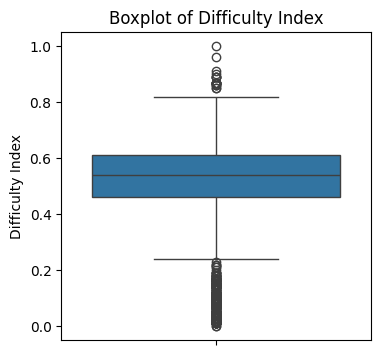

In [27]:
plt.figure(figsize=(4, 4))
sns.boxplot(y='difficulty_idx', data=races_df)
plt.title('Boxplot of Difficulty Index')
plt.ylabel('Difficulty Index')
plt.show()

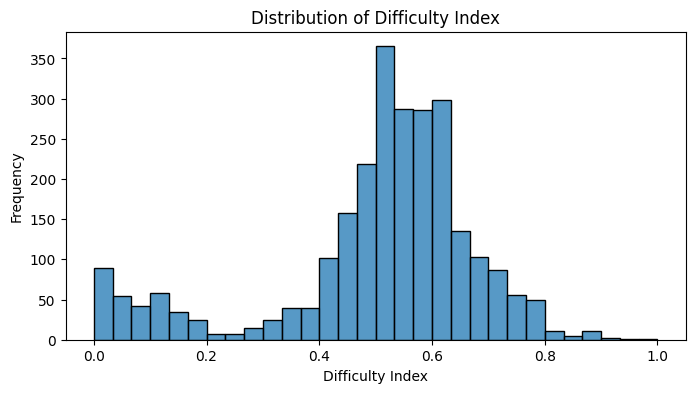

In [28]:
# Plot the distribution of the difficulty index
plt.figure(figsize=(8, 4))
sns.histplot(races_df['difficulty_idx'], bins=30)
plt.title('Distribution of Difficulty Index')
plt.xlabel('Difficulty Index')
plt.ylabel('Frequency')
plt.show()

### ```top_complex_races``` column


In [29]:
# Sort the races DataFrame by the 'race_importance' column in descending order
sorted_races_df = races_df.sort_values(by='difficulty_idx', ascending=False)

# Define the bins and labels
bins = [0, 21, 51, 151, 501, 751, 1001, 1301, 1701, 2001, 2401, len(sorted_races_df) + 1]
labels = ['Top 20', 'Top 50', 'Top 150', 'Top 500', 'Top 750', 'Top 1000', 'Top 1300', 'Top 1700', 'Top 2000', 'Top 2400', 'Rest']

# Create a new column 'top_races' based on the bins
sorted_races_df['top_complex_races'] = pd.cut(range(1, len(sorted_races_df) + 1), bins=bins, labels=labels, right=False)

# Add the 'top_races' column to the original races_df
races_df = races_df.merge(sorted_races_df[['_url', 'top_complex_races']], on='_url', how='left')

In [30]:
races_df.value_counts("top_complex_races")

top_complex_races
Top 1700    400
Top 2400    400
Top 500     350
Top 1300    300
Top 2000    300
Top 750     250
Top 1000    250
Rest        214
Top 150     100
Top 50       30
Top 20       20
Name: count, dtype: int64

### ```season``` column 

In [31]:
from utils import get_season

# Apply the custom get_season function to create a new column 'season'
races_df['season'] = races_df['start_date'].apply(lambda x: get_season(pd.to_datetime(x)))

# Display the first few rows to verify
print(races_df[['start_date', 'season']].head(5))

   start_date  season
0  2012-04-15  Spring
1  2013-04-14  Spring
2  2014-04-20  Spring
3  2015-04-19  Spring
4  2016-04-17  Spring


### ```avg_slope``` column

Average slope of the stage can be useful as another indicator of stage complexity. We expect that the higher the slope the more complex is the race. 

In [32]:
# Calculate the average slope and create the new column
races_df['avg_slope'] = ((races_df['climb_total'] / races_df['length'])*100).round(4)

# Display the first few rows to verify
print(races_df[['climb_total', 'length', 'avg_slope']].head(10))

   climb_total    length  avg_slope
0       3300.0  256500.0     1.2865
1       3500.0  251800.0     1.3900
2       3495.0  251400.0     1.3902
3       3558.0  258000.0     1.3791
4       3320.0  248700.0     1.3349
5       3328.0  261000.0     1.2751
6       3496.0  263000.0     1.3293
7       3536.0  265700.0     1.3308
8       2893.0  218600.0     1.3234
9       3460.0  254100.0     1.3617


In [33]:
print(f"Null values in avg_slope column: {int(races_df['avg_slope'].isnull().sum())}")

Null values in avg_slope column: 0


In [34]:
races_df['avg_slope'].describe()

count    2614.000000
mean        1.491999
std         0.904758
min         0.006900
25%         0.884725
50%         1.347350
75%         1.900875
max        10.326100
Name: avg_slope, dtype: float64

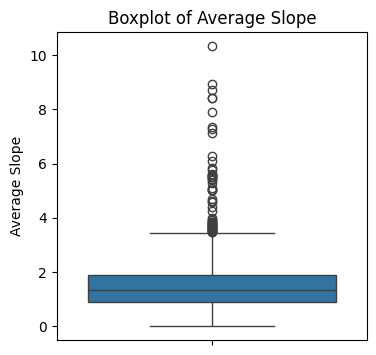

In [35]:
plt.figure(figsize=(4, 4))
sns.boxplot(y='avg_slope', data=races_df)
plt.title('Boxplot of Average Slope')
plt.ylabel('Average Slope')
plt.show()

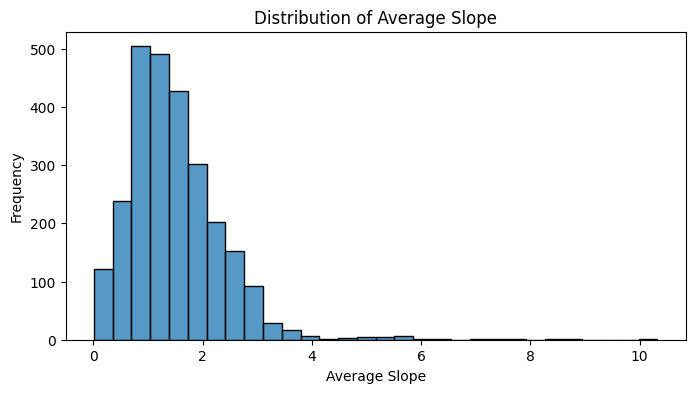

In [36]:
# Plot the distribution of the average slope
plt.figure(figsize=(8, 4))
sns.histplot(races_df['avg_slope'], bins=30)
plt.title('Distribution of Average Slope')
plt.xlabel('Average Slope')
plt.ylabel('Frequency')
plt.show()

### ```min_duration``` column 

We decided to drop the ```delta``` column and the ```duration``` column as they contain many errors and as in the final clustering we will try to cluster stages and riders rather than riders and stages together. For this reason, we create a new feature min_duration that contains the total time taken for the first cyclist to finish the stage, as this could be another measure to assess the difficulty of the stage.

In [37]:
# Group by '_url' and take the first entry in 'duration' for each group
races_df['min_duration'] = races_df.groupby('_url')['duration'].transform('first')

# Display the first few rows to verify
print(races_df[['duration', 'min_duration']].head(7))

# Convert 'min_duration' to total seconds
races_df['min_duration'] = races_df['min_duration'].apply(lambda x: int(pd.to_timedelta(str(x)).total_seconds()))

races_df['min_duration'] = races_df["min_duration"] / 3600

# Display the first few rows to verify
print(races_df[['min_duration']].head(2))

   duration min_duration
0  06:32:35     06:32:35
1  06:35:21     06:35:21
2  06:25:57     06:25:57
3  06:31:49     06:31:49
4  06:18:03     06:18:03
5  06:31:40     06:31:40
6  06:35:07     06:35:07
   min_duration
0      6.543056
1      6.589167


In [38]:
races_df['min_duration'].describe()

count    2614.000000
mean        4.207206
std         1.634214
min         0.020556
25%         3.703403
50%         4.439167
75%         5.139375
max         9.669722
Name: min_duration, dtype: float64

In [39]:
grouped_df = races_df.groupby('min_duration')[['length', '_url']].value_counts().sort_index()
print(grouped_df)

min_duration  length    _url                          
0.020556      1000.0    tour-de-france/1988/prologue      1
0.022222      1150.0    giro-d-italia/2005/prologue       1
0.058056      3340.0    tour-de-romandie/2012/prologue    1
0.060278      2900.0    paris-nice/2013/prologue          1
0.085000      3870.0    tour-de-romandie/2019/prologue    1
                                                         ..
7.976944      282000.0  tour-de-france/1980/stage-3       1
8.056111      236500.0  tour-de-france/1980/stage-5       1
8.425278      269000.0  tour-de-france/1985/stage-12      1
9.468889      320500.0  tour-de-france/1984/stage-21      1
9.669722      338000.0  tour-de-france/1984/stage-9       1
Name: count, Length: 2614, dtype: int64


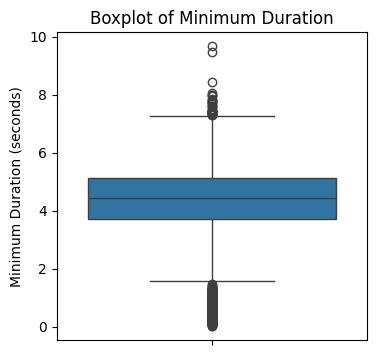

In [40]:
plt.figure(figsize=(4, 4))
sns.boxplot(y='min_duration', data=races_df)
plt.title('Boxplot of Minimum Duration')
plt.ylabel('Minimum Duration (seconds)')
plt.show()

### ```duration_to_length``` column 


In [41]:
# Calculate the average slope and create the new column
races_df['duration_to_length'] = ((races_df['min_duration'] / races_df['length'])*10).round(4)

# Display the first few rows to verify
print(races_df[['min_duration', 'length', 'duration_to_length']].head(10))

   min_duration    length  duration_to_length
0      6.543056  256500.0              0.0003
1      6.589167  251800.0              0.0003
2      6.432500  251400.0              0.0003
3      6.530278  258000.0              0.0003
4      6.300833  248700.0              0.0003
5      6.527778  261000.0              0.0003
6      6.585278  263000.0              0.0003
7      6.471667  265700.0              0.0002
8      5.058056  218600.0              0.0002
9      6.021944  254100.0              0.0002


In [42]:
print(f"Null values in duration_to_length column: {int(races_df['duration_to_length'].isnull().sum())}")

Null values in duration_to_length column: 0


In [43]:
races_df['duration_to_length'].describe()

count    2614.000000
mean        0.000246
std         0.000053
min         0.000200
25%         0.000200
50%         0.000200
75%         0.000300
max         0.000500
Name: duration_to_length, dtype: float64

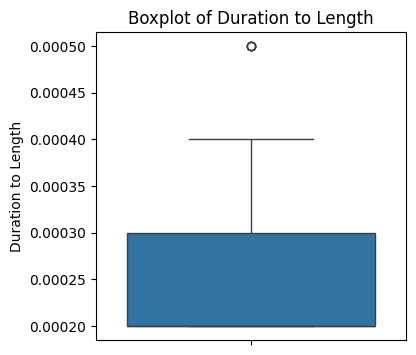

In [44]:
plt.figure(figsize=(4, 4))
sns.boxplot(y='duration_to_length', data=races_df)
plt.title('Boxplot of Duration to Length')
plt.ylabel('Duration to Length')
plt.show()

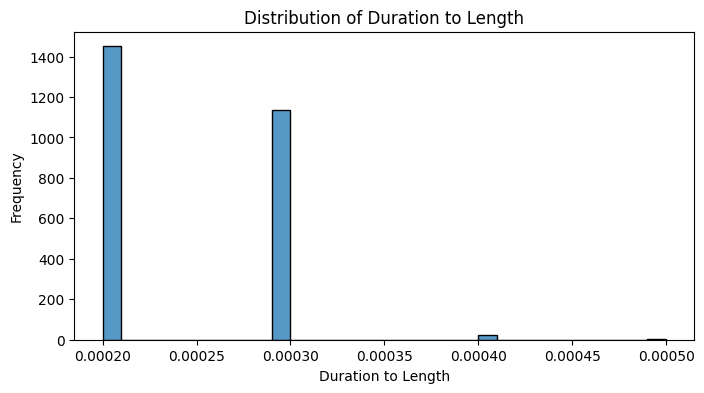

In [45]:
# Plot the distribution of the average slope
plt.figure(figsize=(8, 4))
sns.histplot(races_df['duration_to_length'], bins=30)
plt.title('Distribution of Duration to Length')
plt.xlabel('Duration to Length')
plt.ylabel('Frequency')
plt.show()

### ```startlist_entropy``` column 


The column `startlist_entropy` measures the diversity in startlist quality (`startlist_quality`) between the stages of a race. High values indicate a greater variety in the quality of participants (heterogeneity between stages), while low values reflect a more uniform quality (homogeneity). This measure helps to identify races with more variable or constant levels of competition.


In [46]:
import numpy as np

races_df['real_name'] = races_df['_url'].str.split('/').str[0]

def calculate_entropy(group):
    # Calculate the frequency of cyclist numbers in each group
    cyclist_counts = group.value_counts()
    total_stages = len(group)
    
    # Calculate probabilities for each cyclist number
    probabilities = cyclist_counts / total_stages
    
    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

races_df['startlist_entropy'] = races_df.groupby('real_name')['startlist_quality'].transform(calculate_entropy)

races_df.head()  


,_url,name,points,length,climb_total,profile,startlist_quality,is_tarmac,start_date,duration,...,race_importance,top_races,difficulty_idx,top_complex_races,season,avg_slope,min_duration,duration_to_length,real_name,startlist_entropy
0,amstel-gold-race/2012/result,Amstel Gold Race,225.0,256500.0,3300.0,2.0,1251,False,2012-04-15,06:32:35,...,0.498403,Top 50,0.77,Top 150,Spring,1.2865,6.543056,0.0003,amstel-gold-race,3.459432
1,amstel-gold-race/2013/result,Amstel Gold Race,225.0,251800.0,3500.0,2.0,1149,False,2013-04-14,06:35:21,...,0.311195,Top 750,0.76,Top 150,Spring,1.3900,6.589167,0.0003,amstel-gold-race,3.459432
2,amstel-gold-race/2014/result,Amstel Gold Race,225.0,251400.0,3495.0,2.0,1140,False,2014-04-20,06:25:57,...,0.387745,Top 500,0.76,Top 150,Spring,1.3902,6.432500,0.0003,amstel-gold-race,3.459432
3,amstel-gold-race/2015/result,Amstel Gold Race,225.0,258000.0,3558.0,3.0,1175,False,2015-04-19,06:31:49,...,0.419218,Top 500,0.78,Top 50,Spring,1.3791,6.530278,0.0003,amstel-gold-race,3.459432
4,amstel-gold-race/2016/result,Amstel Gold Race,225.0,248700.0,3320.0,2.0,1120,False,2016-04-17,06:18:03,...,0.371614,Top 500,0.75,Top 150,Spring,1.3349,6.300833,0.0003,amstel-gold-race,3.459432


NOTE: ```real_name``` can be used to capture stages from the same race that changes name over the years. This column allows as to understand all the stages from the "same" race over the years

In [47]:
races_df[races_df['real_name'] == 'san-sebastian']

,_url,name,points,length,climb_total,profile,startlist_quality,is_tarmac,start_date,duration,...,race_importance,top_races,difficulty_idx,top_complex_races,season,avg_slope,min_duration,duration_to_length,real_name,startlist_entropy
871,san-sebastian/2012/result,Clasica Ciclista San Sebastian,225.0,234000.0,3514.0,2.0,854,False,2012-08-14,05:55:34,...,0.202660,Top 1300,0.70,Top 500,Summer,1.5017,5.926111,0.0003,san-sebastian,3.459432
872,san-sebastian/2013/result,Clasica Ciclista San Sebastian,225.0,232000.0,3514.0,2.0,779,False,2013-07-27,05:39:02,...,0.219329,Top 1000,0.70,Top 500,Summer,1.5147,5.650556,0.0002,san-sebastian,3.459432
873,san-sebastian/2014/result,Clasica Ciclista San Sebastian,225.0,219200.0,3796.0,2.0,741,False,2014-08-02,05:31:11,...,0.194209,Top 1300,0.66,Top 500,Summer,1.7318,5.519722,0.0003,san-sebastian,3.459432
874,san-sebastian/2015/result,Clasica Ciclista San Sebastian,225.0,219000.0,3796.0,2.0,929,False,2015-08-01,05:30:22,...,0.246287,Top 1000,0.66,Top 500,Summer,1.7333,5.506111,0.0003,san-sebastian,3.459432
875,san-sebastian/2016/result,Clasica Ciclista San Sebastian,225.0,220200.0,3851.0,2.0,906,False,2016-07-30,05:31:00,...,0.282857,Top 1000,0.67,Top 500,Summer,1.7489,5.516667,0.0003,san-sebastian,3.459432
876,san-sebastian/2017/result,Clásica Ciclista San Sebastian,225.0,231000.0,4156.0,2.0,800,False,2017-07-29,05:52:53,...,0.185353,Top 1300,0.70,Top 500,Summer,1.7991,5.881389,0.0003,san-sebastian,3.459432
877,san-sebastian/2018/result,Clasica Ciclista San Sebastian,225.0,228700.0,4130.0,2.0,790,False,2018-08-04,06:03:45,...,0.176456,Top 1300,0.69,Top 500,Summer,1.8059,6.062500,0.0003,san-sebastian,3.459432
878,san-sebastian/2019/result,Clásica Ciclista San Sebastián,225.0,227300.0,3980.0,2.0,785,False,2019-08-03,05:44:27,...,0.175334,Top 1300,0.69,Top 500,Summer,1.7510,5.740833,0.0003,san-sebastian,3.459432
879,san-sebastian/2021/result,Donostia San Sebastian Klasikoa,225.0,223500.0,4113.0,2.0,645,False,2021-07-31,05:34:31,...,0.177870,Top 1300,0.68,Top 500,Summer,1.8403,5.575278,0.0002,san-sebastian,3.459432
880,san-sebastian/2022/result,Donostia San Sebastian Klasikoa,225.0,224800.0,4147.0,2.0,724,False,2022-07-30,05:31:44,...,0.119497,Top 2000,0.68,Top 500,Summer,1.8448,5.528889,0.0002,san-sebastian,3.459432


In [48]:
print(f"Null values in startlist_entropy column: {int(races_df['startlist_entropy'].isnull().sum())}")

Null values in startlist_entropy column: 0


In [49]:
races_df['startlist_entropy'].describe()

count    2614.000000
mean        4.461867
std         0.771596
min         0.985228
25%         3.897985
50%         4.510788
75%         5.280213
max         5.280213
Name: startlist_entropy, dtype: float64

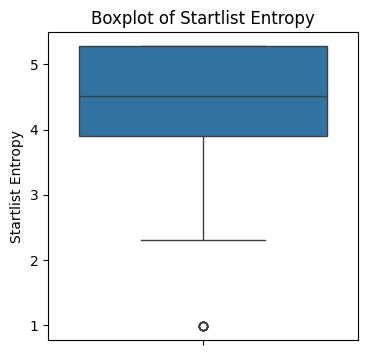

In [50]:
plt.figure(figsize=(4, 4))
sns.boxplot(y='startlist_entropy', data=races_df)
plt.title('Boxplot of Startlist Entropy')
plt.ylabel('Startlist Entropy')
plt.show()

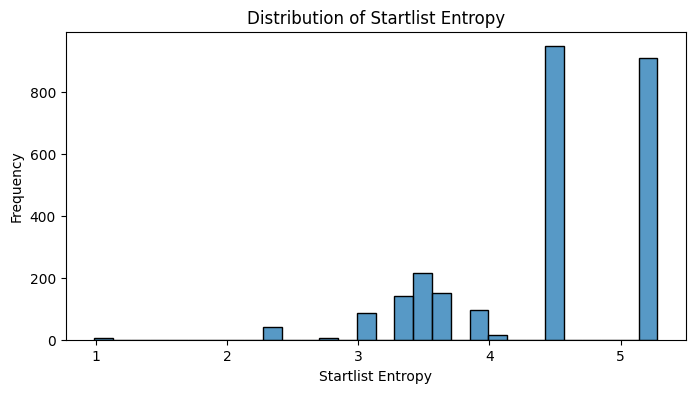

In [51]:
# Plot the distribution of the average slope
plt.figure(figsize=(8, 4))
sns.histplot(races_df['startlist_entropy'], bins=30)
plt.title('Distribution of Startlist Entropy')
plt.xlabel('Startlist Entropy')
plt.ylabel('Frequency')
plt.show()

### ```points_entropy``` column 


TODO: description


In [52]:
import numpy as np

def calculate_entropy(group):
    # Calculate the frequency of cyclist numbers in each group
    cyclist_counts = group.value_counts()
    total_stages = len(group)
    
    # Calculate probabilities for each cyclist number
    probabilities = cyclist_counts / total_stages
    
    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

races_df['points_entropy'] = races_df.groupby('real_name')['points'].transform(calculate_entropy)

races_df.head()  


,_url,name,points,length,climb_total,profile,startlist_quality,is_tarmac,start_date,duration,...,top_races,difficulty_idx,top_complex_races,season,avg_slope,min_duration,duration_to_length,real_name,startlist_entropy,points_entropy
0,amstel-gold-race/2012/result,Amstel Gold Race,225.0,256500.0,3300.0,2.0,1251,False,2012-04-15,06:32:35,...,Top 50,0.77,Top 150,Spring,1.2865,6.543056,0.0003,amstel-gold-race,3.459432,-0.0
1,amstel-gold-race/2013/result,Amstel Gold Race,225.0,251800.0,3500.0,2.0,1149,False,2013-04-14,06:35:21,...,Top 750,0.76,Top 150,Spring,1.3900,6.589167,0.0003,amstel-gold-race,3.459432,-0.0
2,amstel-gold-race/2014/result,Amstel Gold Race,225.0,251400.0,3495.0,2.0,1140,False,2014-04-20,06:25:57,...,Top 500,0.76,Top 150,Spring,1.3902,6.432500,0.0003,amstel-gold-race,3.459432,-0.0
3,amstel-gold-race/2015/result,Amstel Gold Race,225.0,258000.0,3558.0,3.0,1175,False,2015-04-19,06:31:49,...,Top 500,0.78,Top 50,Spring,1.3791,6.530278,0.0003,amstel-gold-race,3.459432,-0.0
4,amstel-gold-race/2016/result,Amstel Gold Race,225.0,248700.0,3320.0,2.0,1120,False,2016-04-17,06:18:03,...,Top 500,0.75,Top 150,Spring,1.3349,6.300833,0.0003,amstel-gold-race,3.459432,-0.0


In [53]:
print(f"Null values in points_entropy column: {int(races_df['points_entropy'].isnull().sum())}")

Null values in points_entropy column: 0


In [54]:
races_df['points_entropy'].describe()

count    2614.000000
mean        0.106216
std         0.131537
min        -0.000000
25%         0.000000
50%         0.128518
75%         0.171182
max         1.419556
Name: points_entropy, dtype: float64

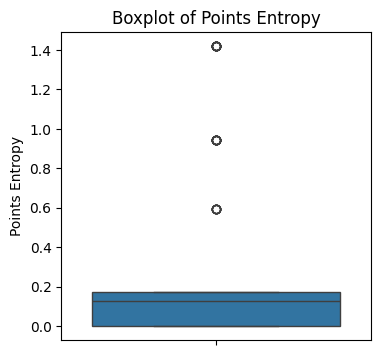

In [55]:
plt.figure(figsize=(4, 4))
sns.boxplot(y='points_entropy', data=races_df)
plt.title('Boxplot of Points Entropy')
plt.ylabel('Points Entropy')
plt.show()

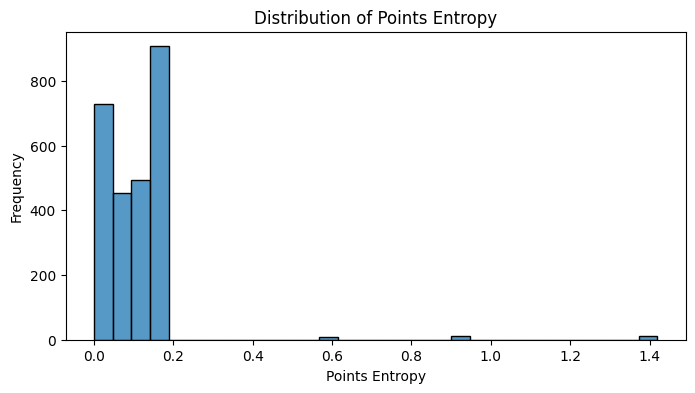

In [56]:
# Plot the distribution of the average slope
plt.figure(figsize=(8, 4))
sns.histplot(races_df['points_entropy'], bins=30)
plt.title('Distribution of Points Entropy')
plt.xlabel('Points Entropy')
plt.ylabel('Frequency')
plt.show()

### ```difficulty_index_2``` column 


Idea: try to construct a difficulty index incorrelated with other features

In [57]:
"""from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Step 1: Normalize Input Features
scaler = MinMaxScaler()
races_df[['length_norm', 'climb_norm', 'profile_norm', 'startlist_norm']] = scaler.fit_transform(
    races_df[['length', 'climb_total', 'profile', 'startlist_quality']]
)

races_df['climb_per_km'] = races_df['climb_total'] / races_df['length']
races_df['profile_climb_interaction'] = races_df['profile_norm'] * races_df['climb_norm']
races_df['profile_startlist_interaction'] = races_df['profile_norm'] * races_df['startlist_norm']

# Step 3: Apply PCA to Reduce Dimensionality
# difficulty_features = races_df[['length_norm', 'climb_norm', 'profile_norm', 'startlist_norm', 
#                                 'climb_per_km', 'profile_climb_interaction', 'profile_startlist_interaction']]


difficulty_features = races_df[['length', 'climb_total', 'difficulty_idx']]

pca = PCA(n_components=1)
races_df['difficulty_index_2'] = pca.fit_transform(difficulty_features)

# Drop the normalized features as they are no longer needed
races_df.drop(columns=['length_norm', 'climb_norm', 'profile_norm', 'startlist_norm', 
                       'climb_per_km', 'profile_climb_interaction', 'profile_startlist_interaction'], inplace=True)

# Normalize the 'difficulty_index_2' column
scaler = MinMaxScaler()
races_df['difficulty_index_2'] = scaler.fit_transform(races_df[['difficulty_index_2']])"""



# Normalize 'climb_total' and 'duration_to_length' before summation
scaler = MinMaxScaler()
races_df[['climb_total_norm', 'duration_to_length_norm', "avg_cyclists_level_norm", "profile_norm"]] = scaler.fit_transform(
    races_df[['climb_total', 'duration_to_length', 'avg_cyclists_level', 'profile']]
)

# Calculate the new difficulty index
races_df["difficulty_index_2"] = 0.2 * races_df["climb_total_norm"] + 0.5 * races_df["duration_to_length_norm"] + 0.2 *races_df["avg_cyclists_level"] + 0.1*races_df["profile_norm"] * 10

# Drop the normalized columns as they are no longer needed
races_df.drop(columns=['climb_total_norm', 'duration_to_length_norm', 'avg_cyclists_level_norm', 'profile_norm'], inplace=True)

# Step 4: Inspect the Result
races_df[['name', '_url', 'difficulty_index_2']].head()

,name,_url,difficulty_index_2
0,Amstel Gold Race,amstel-gold-race/2012/result,0.504047
1,Amstel Gold Race,amstel-gold-race/2013/result,0.543797
2,Amstel Gold Race,amstel-gold-race/2014/result,0.537071
3,Amstel Gold Race,amstel-gold-race/2015/result,0.821316
4,Amstel Gold Race,amstel-gold-race/2016/result,0.553074


In [58]:
races_df['difficulty_index_2'].describe()

count    2614.000000
mean        0.563995
std         0.458314
min        -0.130327
25%         0.212904
50%         0.442427
75%         1.013048
max         1.625543
Name: difficulty_index_2, dtype: float64

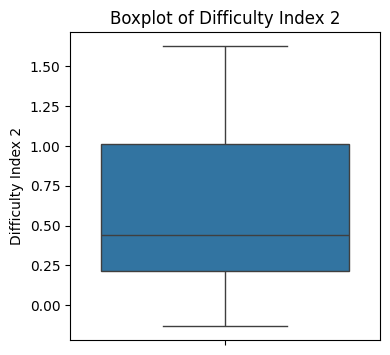

In [59]:
plt.figure(figsize=(4, 4))
sns.boxplot(y='difficulty_index_2', data=races_df)
plt.title('Boxplot of Difficulty Index 2')  
plt.ylabel('Difficulty Index 2')
plt.show()

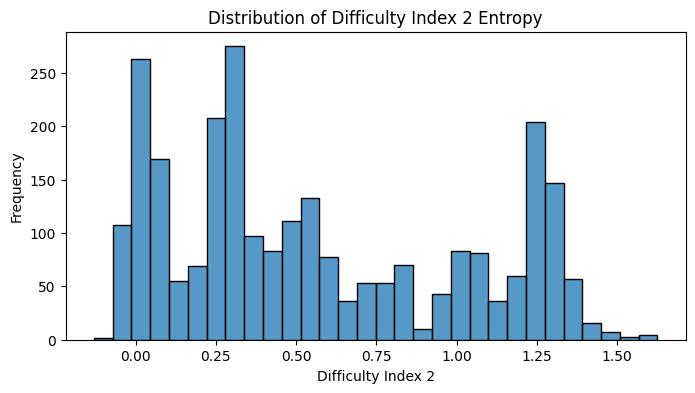

In [60]:
# Plot the distribution of the average slope
plt.figure(figsize=(8, 4))
sns.histplot(races_df['difficulty_index_2'], bins=30)
plt.title('Distribution of Difficulty Index 2 Entropy')
plt.xlabel('Difficulty Index 2')
plt.ylabel('Frequency')
plt.show()

### ```top_complex_races_2``` column


In [61]:
# Sort the races DataFrame by the 'race_importance' column in descending order
sorted_races_df = races_df.sort_values(by='difficulty_index_2', ascending=False)

# Define the bins and labels
bins = [0, 21, 51, 151, 501, 751, 1001, 1301, 1701, 2001, 2401, len(sorted_races_df) + 1]
labels = ['Top 20', 'Top 50', 'Top 150', 'Top 500', 'Top 750', 'Top 1000', 'Top 1300', 'Top 1700', 'Top 2000', 'Top 2400', 'Rest']

# Create a new column 'top_races' based on the bins
sorted_races_df['top_complex_races_2'] = pd.cut(range(1, len(sorted_races_df) + 1), bins=bins, labels=labels, right=False)

# Add the 'top_races' column to the original races_df
races_df = races_df.merge(sorted_races_df[['_url', 'top_complex_races_2']], on='_url', how='left')

In [62]:
races_df.value_counts("top_complex_races_2")

top_complex_races_2
Top 1700    400
Top 2400    400
Top 500     350
Top 1300    300
Top 2000    300
Top 750     250
Top 1000    250
Rest        214
Top 150     100
Top 50       30
Top 20       20
Name: count, dtype: int64

---

### Scatter Plot

In [63]:
#sns.pairplot(races_df, hue='profile')
#plt.show()

In [64]:
#sns.pairplot(races_df, hue='season')
#plt.show()

---

### Correlation Analysis

In [65]:
races_df.columns

Index(['_url', 'name', 'points', 'length', 'climb_total', 'profile',
       'startlist_quality', 'is_tarmac', 'start_date', 'duration',
       'cyclist_number', 'avg_cyclists_level', 'average_age',
       'race_importance', 'top_races', 'difficulty_idx', 'top_complex_races',
       'season', 'avg_slope', 'min_duration', 'duration_to_length',
       'real_name', 'startlist_entropy', 'points_entropy',
       'difficulty_index_2', 'top_complex_races_2'],
      dtype='object')

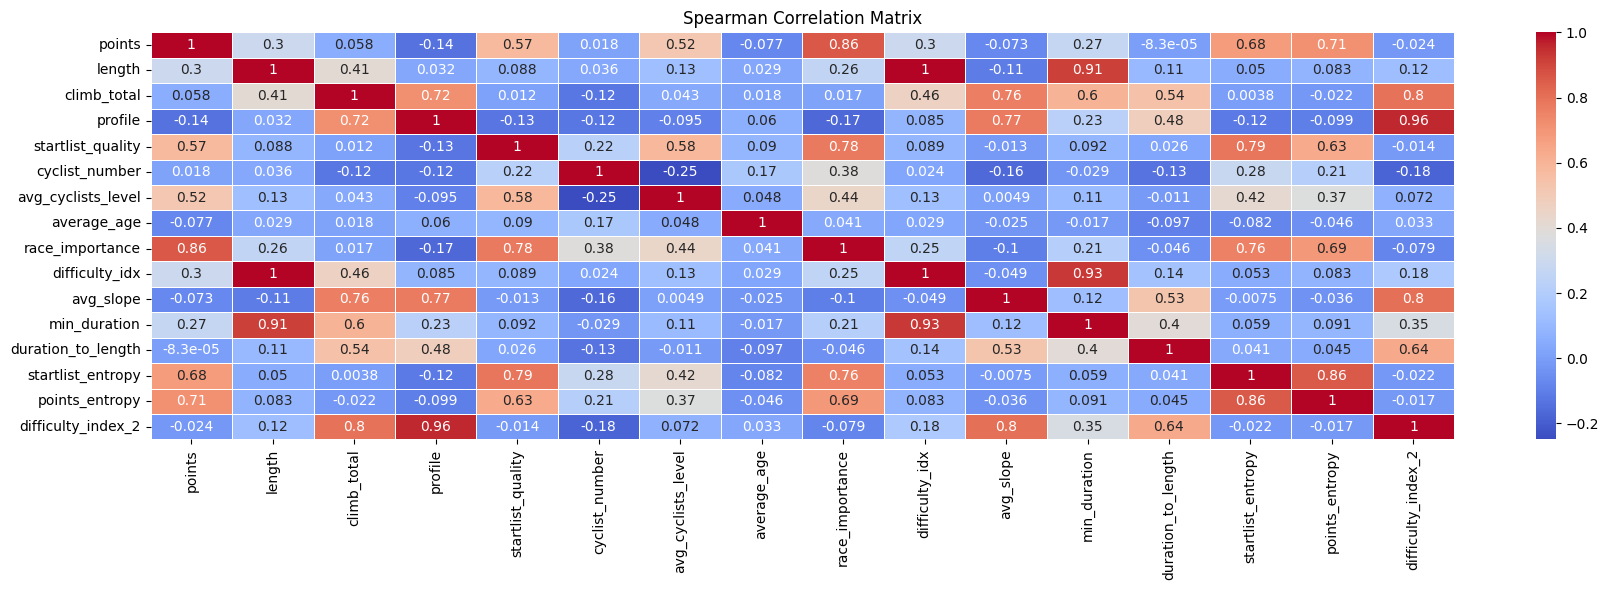

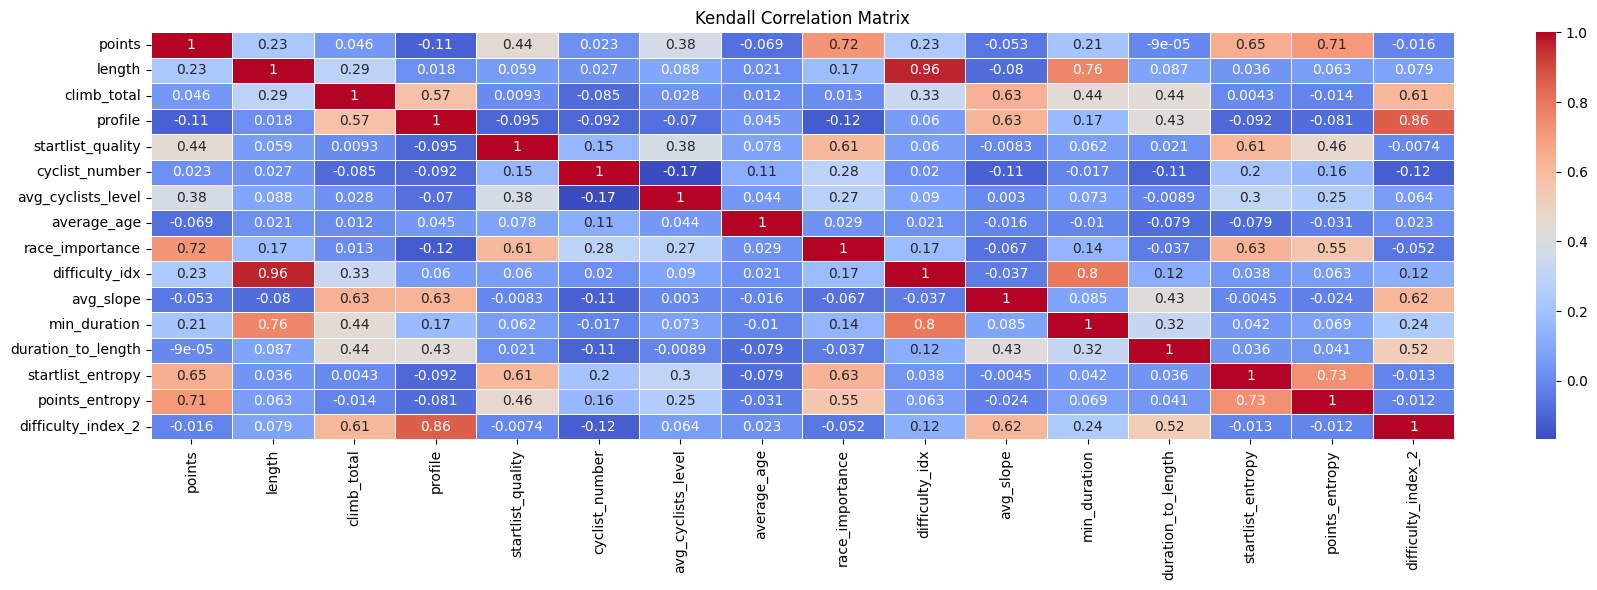

In [66]:
from utils import center_and_scale, correlations, plot_correlations

normalized_races, normalization_scalers_races = center_and_scale(races_df)
cyclists_corr = correlations(normalized_races, ["spearman"])
plot_correlations(cyclists_corr)
"""cyclists_corr = correlations(normalized_races, ["pearson"])
plot_correlations(cyclists_corr)"""
cyclists_corr = correlations(normalized_races, ["kendall"])
plot_correlations(cyclists_corr)

### Columns for Race Complexity Analysis:

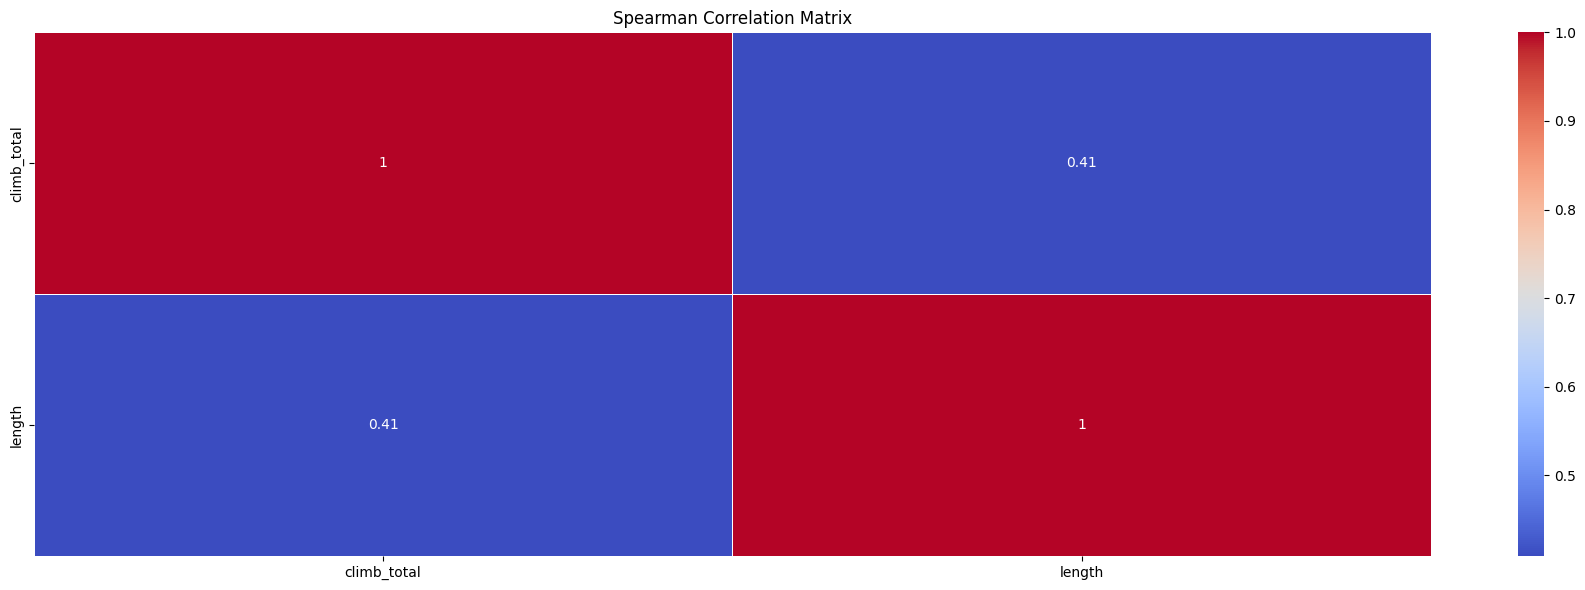

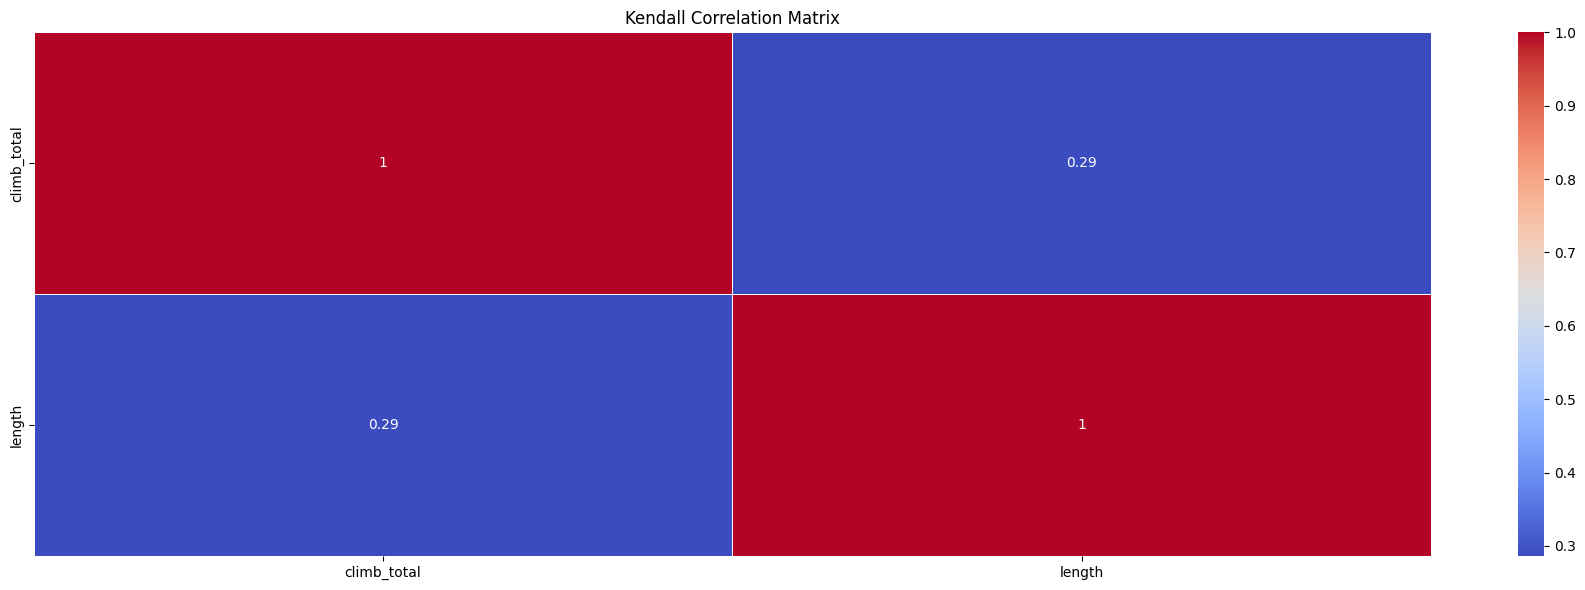

In [67]:
from utils import center_and_scale, correlations, plot_correlations

races_complexity_cluster_col = ["climb_total", "length"]

normalized_cyclist, normalization_scalers_cyclist = center_and_scale(races_df[races_complexity_cluster_col])
cyclists_corr = correlations(normalized_cyclist, ["spearman"])
plot_correlations(cyclists_corr)
normalized_cyclist, normalization_scalers_cyclist = center_and_scale(races_df[races_complexity_cluster_col])
cyclists_corr = correlations(normalized_cyclist, ["kendall"])
plot_correlations(cyclists_corr)

### Columns for Race Importance Analysis:

Remaining Columns

In [68]:
remaining_rows = len(races_df)
print(f" Number of remaining rows: {remaining_rows}")

 Number of remaining rows: 2614


In [69]:
races_df.to_csv('dataset/races_clustering.csv', index=False)